# Assignment 2 - Data Analyst Course
##### in this section you'll find the code and extra notes to analyse the 'Movie' dataset for the Udacity - Data Analyst Nanoodegree
##### changes of the project will be saved by version control tool, GIT. The project will also be posted on GitHub as an extra excercise 
##### I'v set up the Jupyter Notebook locally to have an extra excercise 
##### Below you can find my assignment

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [65]:
# first task: import packages & import the data
# the data can be found on 'tmdb-movies.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn

# we want the visualizations to be displayed in our notebook. Therefor we need to insert next line
%matplotlib inline

movies=pd.read_csv('tmdb-movies.csv')

# we'll print the head of the data to have a first glimps and to get to know the dataset
print(movies.head)

<bound method NDFrame.head of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [66]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

print(movies.dtypes)

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


In [18]:
# as we know the datatypes of each column, we can now check if every column has the right type
# the release date is still formatted as a string, this must be changed to the datetime class
from datetime import datetime
print(movies['release_date'])
# the string is formated: %m/%d/%Y
# i tried to use the to_datetime function but the datetime is not zero parsed, therefor my format would not work
# i can not find a solution to this using the datetime package so I'll add the zero's manipulating the string
movies['release_date']=pd.to_datetime(movies['release_date'],format="%m/%d/%y")


0          6/9/15
1         5/13/15
2         3/18/15
3        12/15/15
4          4/1/15
           ...   
10861     6/15/66
10862    12/21/66
10863      1/1/66
10864     11/2/66
10865    11/15/66
Name: release_date, Length: 10866, dtype: object


##### NO LONGER NEEDED!! I used the wrong format= in the previous excercise. This way the to_datetime function would not work.
##### I found a solution manipulating the strings
##### This was my solution but it is no longer needed
##### -------------------------------------------------------------------------------
##### i tried to use the to_datetime function but the datetime is not zero parsed, therefor my format would not work
##### i can not find a solution to this using the datetime package so I'll add the zero's manipulating the string
##### i must admit this method is not the best method but I could not find a better solution to format the string to a date type

```datum=[]
datum=movies['release_date'].str.split("/"
right_format_date=[]
for dat in datum:
    month=dat[0]
    day=dat[1]
    year=dat[2]
    if len(dat[0])==1:
        month="0"+dat[0]
    elif len(dat[1])==1:
        day="0"+dat[1]
    dat=str(month+"/"+day+"/"+year)
    right_format_date.append(dat)
formated_date=pd.DataFrame(right_format_date)
movies['release_date']=formated_date
movies['release_date']=pd.to_datetime(movies['release_date'],format="%m/%d/%y")```


## Column names seem oké, so we won't be changing any column names

In [67]:
# checking for missing values / checking for zeros 
print(movies.isna().sum())

# below you'll find the missing values in percentages of the total values
print(movies.isna().sum()/movies.shape[0])

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64
id                      0.000000
imdb_id                 0.000920
popularity              0.000000
budget                  0.000000
revenue                 0.000000
original_title          0.000000
cast                    0.006994
homepage                0.729799
director                0.004049
tagline                 0.259893
keywords                0.137401
overview       

In [68]:
# 72,9 % of the homepages are missing. maybe we should drop this column for further analysis
movies=movies.drop('homepage',axis=1)

In [77]:
# find duplicates
print(movies.duplicated().sum())
print(movies[movies.duplicated()])
movies=movies.drop(2090,axis=0)






0
Empty DataFrame
Columns: [id, imdb_id, popularity, budget, revenue, original_title, cast, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
Index: []


In [78]:
# check if duplicate i deleted
print(movies.duplicated().sum())
# if zero: ok!


0


In [79]:
# some movies have no tagline we can change this into No Tagline in stead of NaN
movies['tagline']=movies['tagline'].fillna('No Tagline')

In [80]:
movies['tagline'].value_counts()

No Tagline                                       2824
Based on a true story.                              5
Two Films. One Love.                                3
Be careful what you wish for.                       3
There are no clean getaways.                        2
                                                 ... 
The Greatest High Adventure Ever Filmed!            1
Her past is yet to come.                            1
He's so far undercover he may never get back.       1
Big sisters don't always know best.                 1
Remember Me?                                        1
Name: tagline, Length: 7998, dtype: int64

In [81]:
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                    0
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

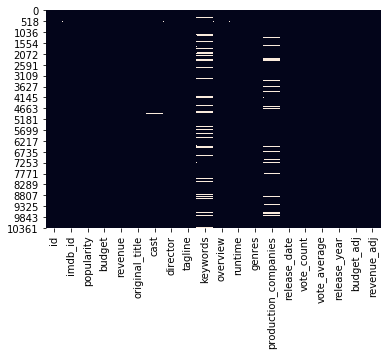

In [102]:
# we'll now visualize the missing data to see if there are certain rows with multiple missing valuse
movies.isnull()
sn.heatmap(movies.isnull(), cbar=False)
# it looks like there is no clear correlation between the missing values so it would not be usefull to drop more rows.
# however, we will drop the rows that have more then 2 missing values
less_then_2_missing=movies.isnull().sum(axis=1)<3
movies=movies[less_then_2_missing]

In [110]:
# we will now look for a way to reconstruct the missing values. 
movies.head()
# it looks like there is no other value that could help us reconstruct the keywords/production companies...
# it might be possible to find the information online trough an API but this is not in the scope of the assignment
# we will now fill in the missing values 
movies['cast']=movies['cast'].fillna('Cast Unknown')
movies['director']=movies['director'].fillna('Director Unknown')
movies['keywords']=movies['keywords'].fillna('No Keywords')
movies['production_companies']=movies['production_companies'].fillna('Production Company Unknown')
movies['imdb_id']=movies['imdb_id'].fillna('ID Unknown')
movies['overview']=movies['overview'].fillna('No Overview')
movies['genres']=movies['genres'].fillna('Genre Unknown')

In [111]:
movies.isnull().sum()

id                       0
imdb_id                  0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     0
director                 0
tagline                  0
keywords                 0
overview                 0
runtime                  0
genres                   0
production_companies     0
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
production_coompanies    0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genre gets the most return on investement?)
> We'll split up this question in multiple questions.
What genres excist? How many are there for any genre?


> How much budget does a genre get? How much revenue does a certain genre generates? 

> Whats the return on investement? ROI as revenue/budget

In [299]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10813.000000,10813.000000,1.081300e+04,1.081300e+04,10813.000000,10813.000000,10813.000000,10813.000000,1.081300e+04,1.081300e+04
mean,65695.319430,0.648983,1.469430e+07,4.001520e+07,102.182188,218.361232,5.971183,2001.294090,1.763399e+07,5.161297e+07
std,91860.683311,1.001928,3.097199e+07,1.172573e+08,30.827539,576.859215,0.933282,12.820313,3.436843e+07,1.449425e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10576.000000,0.209084,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20483.000000,0.385303,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,74945.000000,0.716760,1.550000e+07,2.436277e+07,112.000000,146.000000,6.600000,2011.000000,2.100000e+07,3.402848e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [114]:
# What genres excist? How many are there for any genre?
movies['genres'].value_counts()

Drama                                                 711
Comedy                                                708
Documentary                                           301
Drama|Romance                                         289
Comedy|Drama                                          280
                                                     ... 
Science Fiction|Drama|Romance                           1
Adventure|Fantasy|Animation|Comedy|Science Fiction      1
Science Fiction|Thriller|Fantasy                        1
Adventure|Action|Comedy|Science Fiction|Family          1
War|Action|Thriller                                     1
Name: genres, Length: 2036, dtype: int64

In [286]:
# we will now try to separate the different genres to have a more general view
# we will split up the genres into a list of genres and use this list to melt the dataset into a new dataset to groupby all the separate genres
list_genres=movies['genres'].str.split("|",expand=True)
movies['genre1']=list_genres[0]
movies['genre2']=list_genres[1]
movies['genre3']=list_genres[2]
movies['genre4']=list_genres[3]
genres=['genre1','genre2','genre3','genre4']
movies[genres]
test=pd.melt(movies, id_vars='id', value_vars=genres, value_name='new_genre')
full_table_test=test.merge(movies, on='id',how='outer')
# how many movies are there of each separated genre
full_table_test['new_genre'].value_counts()


Drama              4736
Comedy             3772
Thriller           2784
Action             2368
Romance            1667
Horror             1625
Adventure          1454
Crime              1330
Family             1168
Science Fiction    1158
Fantasy             872
Mystery             772
Animation           689
Documentary         505
Music               392
History             328
War                 248
Foreign             177
Western             154
TV Movie            151
Genre Unknown         8
Name: new_genre, dtype: int64

In [287]:
# ROI per genre
average_per_genre=full_table_test.groupby('new_genre',as_index=False)['budget','revenue'].mean()
average_per_genre['ROI']=average_per_genre['revenue']/average_per_genre['budget']
average_per_genre.head()


,new_genre,budget,revenue,ROI
0,Action,2.775934e+07,7.219816e+07,2.600860
1,Adventure,3.753217e+07,1.133219e+08,3.019326
2,Animation,2.329998e+07,7.532645e+07,3.232897
3,Comedy,1.315800e+07,3.707431e+07,2.817624
4,Crime,1.757779e+07,4.218267e+07,2.399771


Text(0.5, 1.0, 'Which genre gets the most budget on average?')

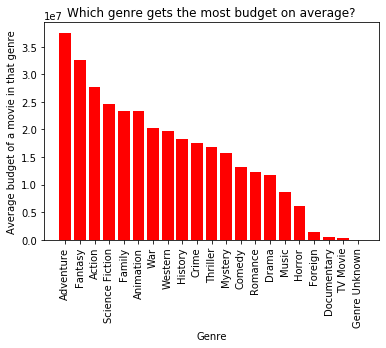

In [297]:
# figure budget per genre
place_1=np.arange(1,22)
average_per_genre=average_per_genre.sort_values('budget',ascending=False)
plt.bar(place_1, average_per_genre['budget'],tick_label=profitability_per_genre['new_genre'], color='red')
plt.xticks(place_1,average_per_genre['new_genre'] , rotation='vertical');
plt.xlabel('Genre')
plt.ylabel('Average budget of a movie in that genre')
plt.title('Which genre gets the most budget on average?')

Text(0.5, 1.0, 'Which genre gets the most revenue on average?')

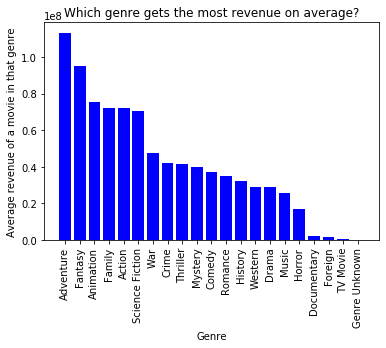

In [298]:
# figure revenue per genre
average_per_genre=average_per_genre.sort_values('revenue',ascending=False)
plt.bar(place_1, average_per_genre['revenue'],tick_label=average_per_genre['new_genre'], color='blue')
plt.xticks(place_1,average_per_genre['new_genre'] , rotation='vertical');
plt.xlabel('Genre')
plt.ylabel('Average revenue of a movie in that genre')
plt.title('Which genre gets the most revenue on average?')

Text(0.5, 1.0, 'Which genre gets the most return on investement on average?')

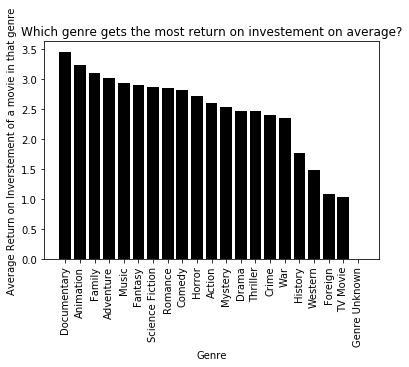

In [295]:
average_per_genre=average_per_genre.sort_values('ROI',ascending=False)
plt.bar(place_1, average_per_genre['ROI'],tick_label=average_per_genre['new_genre'], color='black')
plt.xticks(place_1,average_per_genre['new_genre'] , rotation='vertical');
plt.xlabel('Genre')
plt.ylabel('Average Return on Inverstement of a movie in that genre')
plt.title('Which genre gets the most return on investement on average?')

## Findings 

See figures. 



### Research Question 2 (How important is the presence of a tagline in a movie?)
> We'll make an assumption: if there is no tagline value in the dataset there was no clear tagline in the movie. 
We could ask ourselves for markering purposes how important it is to create a clear/distinguishable tagline.

> Will the movie make more revenue if there is a clear tagline? 

#### Question: Is there a difference in the average revenue generated by a movie with a clear tagline or without a clear tagline?

In [204]:
def check_tagline(tagline):
    if tagline != "No Tagline":
        tagline="Tagline"
    return tagline
movies['tagline_check']=movies['tagline'].apply(check_tagline)
movies.groupby('tagline_check',as_index=False)["revenue"].mean()

,tagline_check,revenue
0,No Tagline,3.723958e+06
1,Tagline,5.258676e+07


## Findings


> We can state that there is a difference in average revenue between a movie with or without a tagline. 

> However we don't know wether this difference is significant. Further statistical calculations should be done to see if the difference is significant. I do not have this knowledge yet so we just state that there is a difference.